## Introducing Deep Learning

This notebook will demonstrate how to whip up simple shallow and deep neural networks in both Keras and PyTorch, and how it fits into our larger machine learning pipelines.

### imports and data

For our examples, we will be using toy, generated data. This helps us in being more precise with what our models are doing. A common machine learning paradigm is classification, where we are given labelled data: an input, and an output class. We will be making such a classification dataset using scikit-learns make dataset functionality.

In [2]:
import sklearn.datasets
import sklearn.model_selection

In [3]:
X, y = sklearn.datasets.make_classification(n_samples=200, n_features=20, n_classes=2)

In [4]:
X[0]

array([ 0.96876293, -0.52694772, -0.99029605,  0.70087529, -0.30359425,
       -0.64620773,  0.52506901,  0.67570098,  0.3464265 ,  0.54669014,
       -0.50260531,  1.52205316, -0.46256507, -0.88677541, -1.93605427,
       -1.05017062, -1.02679003,  0.52799241,  0.16138265,  0.30470877])

In [5]:
y[0]

0

In [6]:
import matplotlib.pyplot as plt

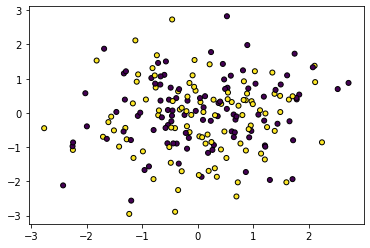

In [10]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

Here, we generated a dataset of size 100, with 20 fearures, based on a Gaussian process where there are two 'classes'.
Our machine learning algorithm is performing well if it can correctly identify if an input belongs to the class it is labelled as.

For our models to train, it needs to be split into a training and testing dataset.

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

Let us train a simple model and see how well it does on this task. Logistic regression is a popular task for classification.

In [13]:
import sklearn.linear_model

In [14]:
logreg = sklearn.linear_model.LogisticRegression()

In [15]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
logreg.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

In [17]:
sklearn.metrics.accuracy_score(y_test, logreg.predict(X_test))

0.92

Not bad - 86% accuracy. Now that we have a basic ML pipeline, let's make this deep!

### Single layer net in Keras

In [18]:
## Keras
import keras
import tensorflow as tf
import numpy as np

Keras makes creating deep learning models really easy. Here is one with only one hidden layer with 20 units, taking an input with 20 features. It uses relu activation for the first layer, and then a sigmoid for the last layer to make its prediction. The loss is binary cross entropy which is commonly used for prediction problems, and the ADAM optimiser.

In [19]:
model = keras.models.Sequential([keras.layers.Dense(20, input_dim=20, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [20]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [21]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 16ms/step - loss: 0.6292
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.6026
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.5767
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5538
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 0.5334
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5118
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4934
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4757
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4586
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4430
Epoch 11/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4285
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4132
Epoch 13/200
5/5 [==============================] - 0s 7ms

In [22]:
sklearn.metrics.accuracy_score(y_test, model.predict_classes(X_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9

Neat - our single layer network performs as well as logistic regression for this toy dataset. 
Let us now build the same in PyTorch!

### Single Layer Net in PyTorch

PyTorch is a little more involved than Keras. We need to initialise our network with the various parts we will be using. We are using the same parameters as the Keras example. We then define what a forward pass looks like, which is kind of similar to the way we stacked networks in Keras.

In [23]:
## Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [24]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(20, 20)
        # Output layer, 2 units - one for each digit
        self.output = nn.Linear(20, 1)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [25]:
net = Network()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [26]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.reshape(torch.tensor(y_train), (150, 1))

Unlike Keras where we hit fit fit and the training happens, we have to define a training epoch, where we set our gradients to zero, run the test data, do a backward pass, and then update the weights. This is actually how a neural network trains, so its useful to see it broken down like this.

In [27]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients
    loss.backward()
    # (4) update weights
    opt.step()        
    losses.append(loss.data.numpy())
    return losses

In [28]:
import matplotlib.pyplot as plt

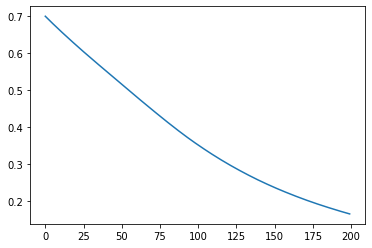

In [29]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())
plt.plot(e_losses)

That little loss plot is useful for us to see how our model improves with each epoch. We did 200 epochs like the Keras example. Unlike scikit-learn or Keras objects, we don't have a predict method, but instead pass the test data directly to the net. The little function below that converts the results into a way which we can feed into a metric function.

In [30]:
output = net(torch.tensor(X_test).float())

In [31]:
def to_label(tensor):
    labels = []
    for val in tensor:
        if val > 0.5:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [32]:
y_pred = to_label(output)

In [33]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.86

Cool! So simple single layer neural networks in both Keras and PyTorch function more or less the same, not beating logistic regression by much. Let us now make our networks deep, and see if that helps!

### Keras Deep Net

Making a neural net deeper simply means adding more layers or complexity. Lets add an extra layer and increase the number of units and see how it does!

In [34]:
model = keras.models.Sequential([keras.layers.Dense(20, input_dim=20, activation='relu'),
                                 keras.layers.Dense(20, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [35]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [36]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7300
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6927
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6640
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 0.6364
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6102
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5868
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5644
Epoch 8/200
5/5 [==============================] - 0s 11ms/step - loss: 0.5437
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5230
Epoch 10/200
5/5 [==============================] - 0s 12ms/step - loss: 0.5025
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4833
Epoch 12/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4643
Epoch 13/200
5/5 [==============================] - 0s 6ms

5/5 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 105/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 106/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0108
Epoch 107/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 108/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 109/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 110/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 112/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 113/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 114/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0087
Epoch 115/200
5/5 [==============================] - 0s 14ms/step - loss: 0.0085
Epoch 116/200
5/5 [==============================] 

In [37]:
sklearn.metrics.accuracy_score(y_test, model.predict_classes(X_test))

0.88

### PyTorch deep net

In [40]:
class DeepNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(20, 20)

        # Output layer
        self.output = nn.Linear(20, 1)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [41]:
net = DeepNetwork()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

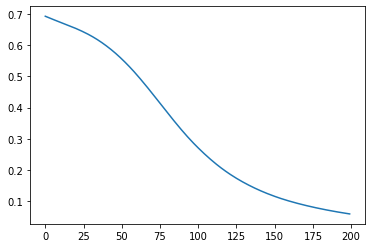

In [42]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())
plt.plot(e_losses)

In [43]:
output = net(torch.tensor(X_test).float())

In [44]:
y_pred = to_label(output)

In [45]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.84

Adding just one layer improved model accuracies for both our Keras and PyTorch implementations!
Adding depth adds non-linearity and is able to capture more complex relations. Keras and PyTorch have different set ups and formats, and you would want to switch things around as you see fit.